In [1]:
#Bernstein-Vazirani Algorithm 

#https://youtu.be/sqJIpHYl7oo?list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY

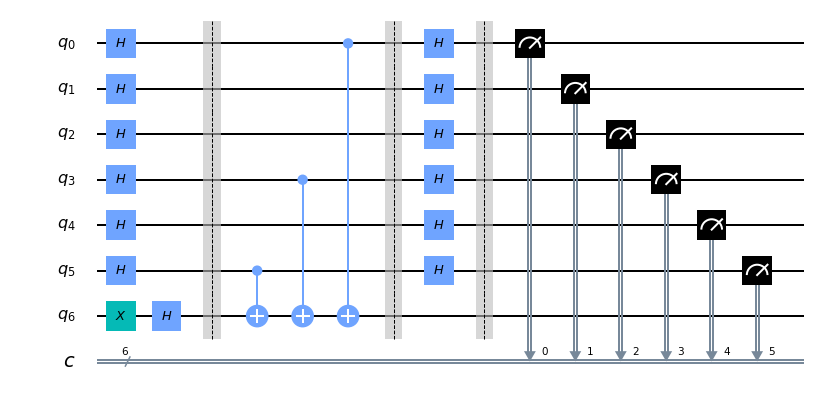

In [2]:

from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

secretnumber ='101001'

circuit = QuantumCircuit(6+1,6)

circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)
circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.draw(output='mpl')


In [3]:
from qiskit import Aer
simulator=Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator,shots=1).result()
counts= result.get_counts()
print(counts)

{'101001': 1}


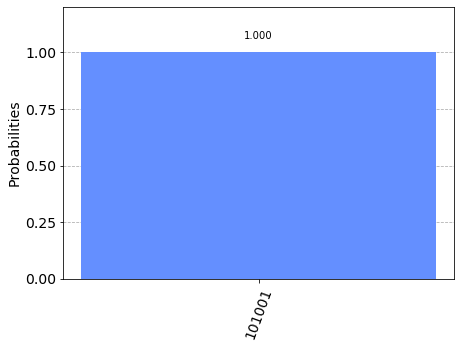

In [4]:

plot_histogram(result.get_counts(circuit))

In [5]:
from qiskit import IBMQ
f = open("key.txt","r")   # token from https://quantum-computing.ibm.com/account
key = f.read()

IBMQ.save_account(key)
IBMQ.load_account()

Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)


Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


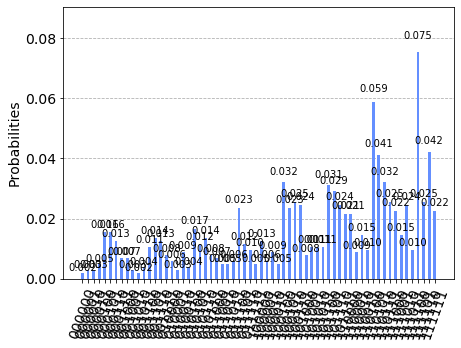

In [7]:
result = job.result()
plot_histogram(result.get_counts(circuit))